# Air Quality Index Detection

Air is what keeps humans alive. Monitoring it and understanding its quality is of immense importance to our well-being.

Content
The dataset contains air quality data and AQI (Air Quality Index) at hourly and daily level of various stations across multiple cities in India.

AQI
A tutorial of how AQI is calculated is available here: https://www.kaggle.com/rohanrao/calculating-aqi-air-quality-index

Cities
Ahmedabad, Aizawl, Amaravati, Amritsar, Bengaluru, Bhopal, Brajrajnagar, Chandigarh, Chennai, Coimbatore, Delhi, Ernakulam, Gurugram, Guwahati, Hyderabad, Jaipur, Jorapokhar, Kochi, Kolkata, Lucknow, Mumbai, Patna, Shillong, Talcher, Thiruvananthapuram, Visakhapatnam

Acknowledgements
The data has been made publicly available by the Central Pollution Control Board: https://cpcb.nic.in/ which is the official portal of Government of India. They also have a real-time monitoring app: https://app.cpcbccr.com/AQI_India/

Noise
Similar to air monitoring data, a dataset on noise decibel levels in India is available here: https://www.kaggle.com/rohanrao/noise-monitoring-data-in-india

### importing libraries

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [211]:
#import data
data = pd.read_csv('city_day.csv')

In [212]:
type(data)

pandas.core.frame.DataFrame

In [213]:
#full data 
data

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [214]:
data.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [215]:
data.tail()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [216]:
data.sample(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
23257,Mumbai,2018-11-03,40.22,100.16,50.57,50.71,101.30,NaN,1.95,14.27,41.95,2.07,NaN,NaN,132.0,Moderate
11804,Delhi,2019-04-25,86.41,274.39,9.48,39.89,30.31,40.86,1.31,17.67,65.26,3.38,23.29,1.42,251.0,Poor
15256,Hyderabad,2016-11-09,65.33,103.80,8.22,42.02,13.74,24.24,0.45,35.56,74.13,0.12,1.21,0.13,147.0,Moderate
3604,Amritsar,2018-08-12,NaN,65.08,5.52,7.83,13.35,7.46,NaN,8.41,28.86,2.07,1.73,11.65,43.0,Good
24610,Patna,2017-06-16,NaN,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,0.00,0.00,0.00,NaN,NaN
28308,Visakhapatnam,2017-02-25,54.92,100.52,11.29,26.63,23.31,10.56,1.18,11.52,36.23,3.97,4.62,0.88,129.0,Moderate
3410,Amritsar,2018-01-30,61.12,131.87,72.13,47.57,120.39,17.18,0.92,3.52,13.38,12.70,8.52,7.04,142.0,Moderate
24476,Patna,2017-02-02,172.17,NaN,53.50,38.73,92.25,NaN,1.71,8.97,5.78,0.18,0.67,0.22,331.0,Very Poor
13279,Gurugram,2018-04-24,76.49,235.17,0.75,NaN,16.76,NaN,0.30,NaN,38.39,NaN,NaN,NaN,182.0,Moderate
4535,Bengaluru,2015-08-30,17.27,NaN,1.37,5.53,3.77,26.46,2.76,0.73,12.65,NaN,1.13,NaN,121.0,Moderate


# Data Analyis and Preprocessing

In [217]:
data.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [218]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


Missing data found
# Missing data handling

In [219]:
data = data.dropna()
data = data.drop(['City','Date','AQI_Bucket'],axis=1)

In [220]:
data = data.fillna(data.median())

In [221]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [222]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6236 entries, 2123 to 29529
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM2.5    6236 non-null   float64
 1   PM10     6236 non-null   float64
 2   NO       6236 non-null   float64
 3   NO2      6236 non-null   float64
 4   NOx      6236 non-null   float64
 5   NH3      6236 non-null   float64
 6   CO       6236 non-null   float64
 7   SO2      6236 non-null   float64
 8   O3       6236 non-null   float64
 9   Benzene  6236 non-null   float64
 10  Toluene  6236 non-null   float64
 11  Xylene   6236 non-null   float64
 12  AQI      6236 non-null   float64
dtypes: float64(13)
memory usage: 682.1 KB


# Exploratory Data Analysis

In [223]:
data["PM2.5"].describe()

count    6236.000000
mean       61.327365
std        53.709682
min         2.000000
25%        27.927500
50%        47.490000
75%        73.442500
max       639.190000
Name: PM2.5, dtype: float64

In [224]:
data.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
PM2.5,1.000000,0.895543,0.604239,0.559055,0.618705,0.582025,0.422486,0.249567,0.293691,0.203572,0.475935,0.068741,0.924028
PM10,0.895543,1.000000,0.633340,0.625172,0.672993,0.585555,0.395632,0.280301,0.306355,0.222376,0.518722,0.092896,0.916576
NO,0.604239,0.633340,1.000000,0.527426,0.875593,0.432795,0.292911,0.200964,0.048602,0.377932,0.541146,0.134869,0.622031
NO2,0.559055,0.625172,0.527426,1.000000,0.692273,0.387388,0.231773,0.386170,0.251862,0.246807,0.499104,0.081074,0.576308
NOx,0.618705,0.672993,0.875593,0.692273,1.000000,0.411122,0.336048,0.192094,0.083137,0.492704,0.596449,0.183274,0.658264
NH3,0.582025,0.585555,0.432795,0.387388,0.411122,1.000000,0.449340,0.192573,0.157271,0.101514,0.323563,0.015100,0.589695
CO,0.422486,0.395632,0.292911,0.231773,0.336048,0.449340,1.000000,0.046117,0.058788,0.107568,0.200851,0.111264,0.494508
SO2,0.249567,0.280301,0.200964,0.386170,0.192094,0.192573,0.046117,1.000000,0.252239,-0.003376,0.155446,0.002030,0.254686
O3,0.293691,0.306355,0.048602,0.251862,0.083137,0.157271,0.058788,0.252239,1.000000,-0.037917,0.068549,-0.079171,0.334609
Benzene,0.203572,0.222376,0.377932,0.246807,0.492704,0.101514,0.107568,-0.003376,-0.037917,1.000000,0.469256,0.281133,0.207927


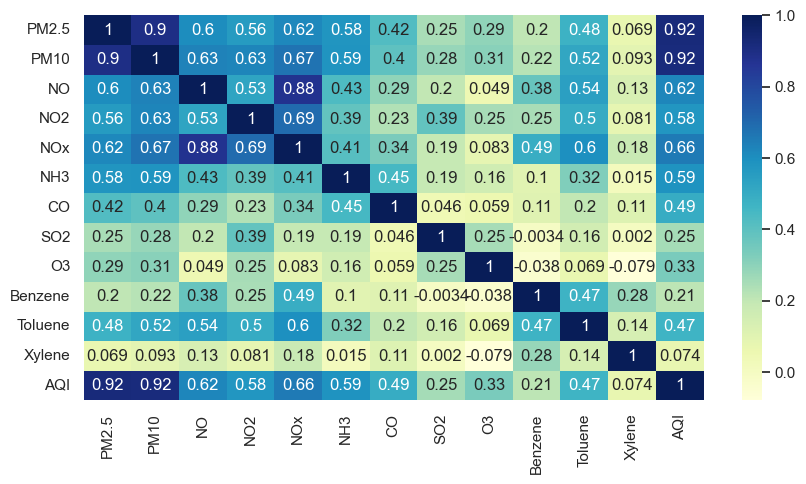

In [225]:
sns.set(rc={'figure.figsize':(10,5)})
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True) 

<Axes: xlabel='AQI_Bucket', ylabel='PM2.5'>

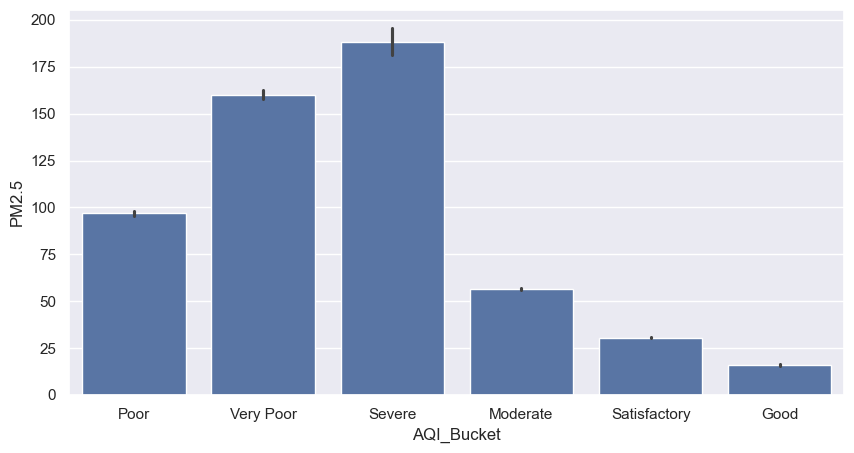

In [226]:
df = pd.read_csv('city_day.csv')
sns.barplot(x=df.AQI_Bucket,y=df["PM2.5"])

<Axes: xlabel='AQI_Bucket', ylabel='PM10'>

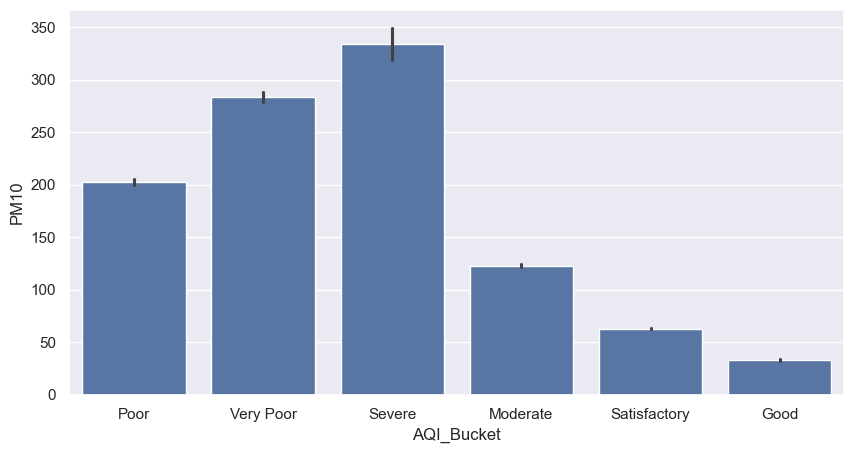

In [227]:
df = pd.read_csv('city_day.csv')
sns.barplot(x=df.AQI_Bucket,y=df["PM10"])

<Axes: xlabel='AQI_Bucket', ylabel='CO'>

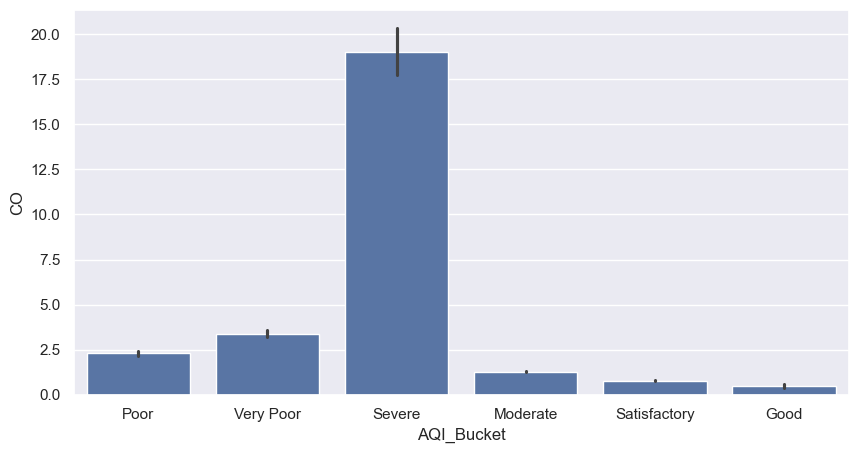

In [228]:
df = pd.read_csv('city_day.csv')
sns.barplot(x=df.AQI_Bucket,y=df["CO"])

<Axes: xlabel='AQI_Bucket', ylabel='NO'>

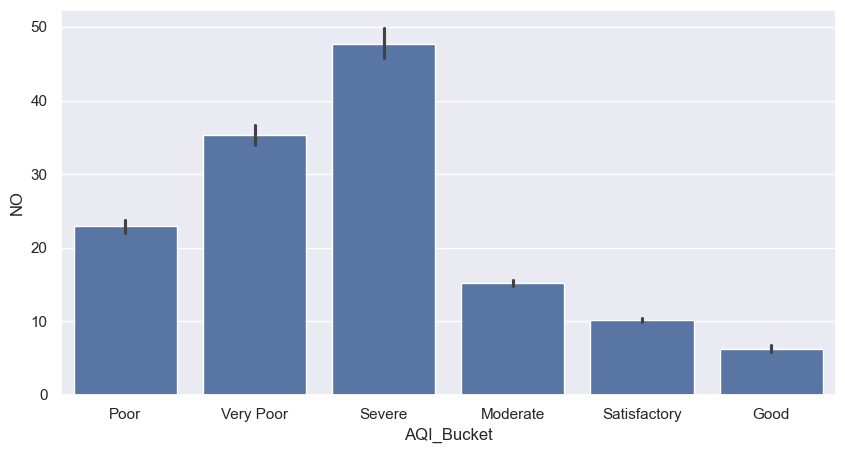

In [229]:
df = pd.read_csv('city_day.csv')
sns.barplot(x=df.AQI_Bucket,y=df["NO"])

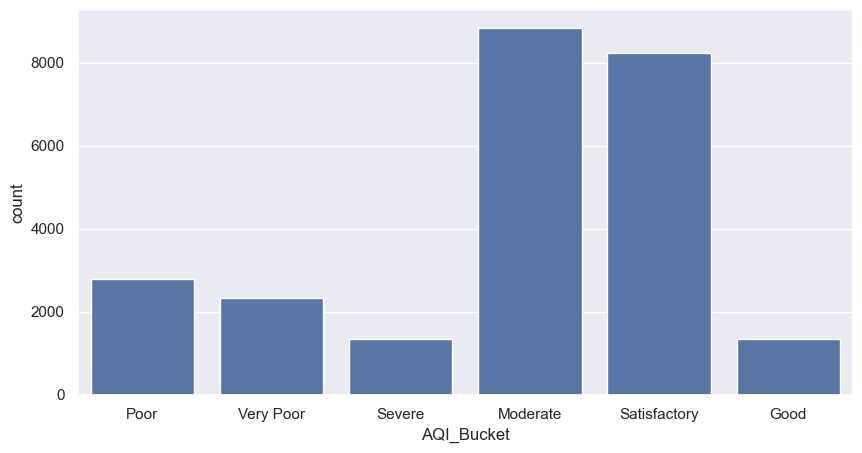

In [230]:
import seaborn as sns
sns.countplot(x =df['AQI_Bucket'], data = df)
plt.savefig("result.png")

In [231]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2123,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0
2124,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0
2125,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0
2126,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0
2127,72.47,114.84,5.23,23.20,16.59,12.25,0.16,10.55,109.74,0.21,4.71,0.08,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


<Axes: xlabel='AQI_Bucket', ylabel='count'>

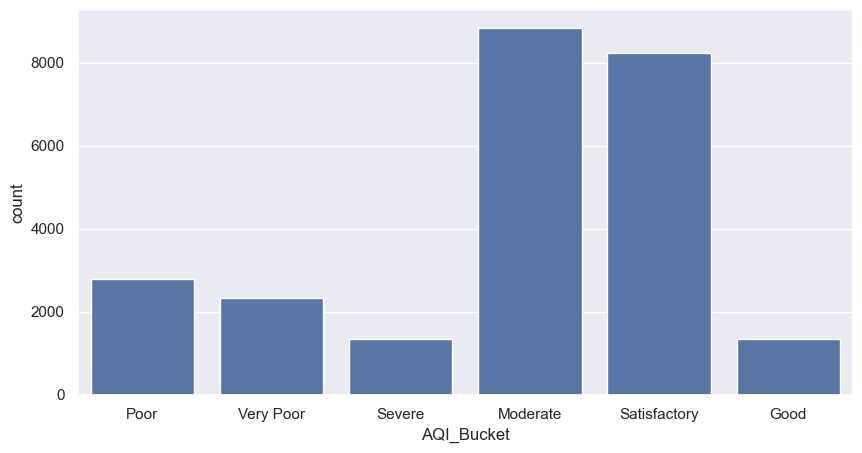

In [232]:
sns.countplot(x =df['AQI_Bucket'], data = df) 

In [233]:
# Preprocessing
# Outlier detection using IQR method
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [234]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2137,74.28,141.22,6.10,44.97,28.88,15.73,0.09,21.90,60.62,0.26,4.79,0.16,196.0
2138,50.32,102.77,1.73,33.85,19.41,12.56,0.10,13.65,68.15,0.20,4.29,0.10,132.0
2139,58.47,115.27,4.93,41.64,26.15,15.20,0.16,18.37,73.75,0.23,5.51,0.16,147.0
2140,89.35,131.48,7.97,42.10,28.88,21.24,0.24,7.42,44.67,0.28,7.01,0.19,179.0
2141,64.42,99.74,7.20,34.78,24.36,17.63,0.15,5.81,50.16,0.24,6.11,0.14,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,7.63,32.27,5.91,23.27,17.19,11.15,0.46,6.87,19.90,1.45,5.37,1.45,47.0
29526,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0
29527,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0
29528,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0


In [235]:
# Interpolation
data.interpolate(inplace=True)

In [236]:
# Data normalization
scaler = StandardScaler()
data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']] = scaler.fit_transform(data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']])

In [237]:
# Splitting the dataset into train and test sets
X = data.drop(['AQI'], axis=1)
y = data['AQI']

In [238]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [239]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2137,1.232930,0.976591,-0.469555,1.271374,0.545089,-0.098858,-1.731054,2.460605,1.710091,-0.967028,-0.332602,-0.821865,196.0
2138,0.280449,0.170738,-1.063561,0.514507,-0.192880,-0.393041,-1.700847,0.764078,2.187972,-0.997153,-0.406509,-0.861031,132.0
2139,0.604435,0.432719,-0.628591,1.044722,0.332348,-0.148043,-1.519602,1.734697,2.543369,-0.982091,-0.226177,-0.821865,147.0
2140,1.832007,0.772455,-0.215369,1.076031,0.545089,0.412481,-1.277942,-0.517057,0.697845,-0.956986,-0.004458,-0.802281,179.0
2141,0.840965,0.107233,-0.320034,0.577806,0.192859,0.077466,-1.549810,-0.848137,1.046260,-0.977070,-0.137489,-0.834920,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,-1.416605,-1.306834,-0.495381,-0.205605,-0.365878,-0.523892,-0.613378,-0.630159,-0.874151,-0.369543,-0.246871,0.020212,47.0
29526,-1.122831,-0.915540,-0.254789,-0.083772,-0.182749,-0.401393,-0.583171,-0.284684,-0.658375,0.027106,0.743475,-0.449784,41.0
29527,-0.750743,-0.430351,-0.833842,-0.015708,-0.417309,-0.445938,-0.432133,0.572833,-0.224283,-0.726026,-0.713959,-0.678255,70.0
29528,-0.809180,-0.605564,-0.829765,0.220473,-0.277041,-0.564724,-0.552963,-0.311417,-0.172243,-1.092550,-1.039148,-0.926308,68.0


In [240]:
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene
2137,1.232930,0.976591,-0.469555,1.271374,0.545089,-0.098858,-1.731054,2.460605,1.710091,-0.967028,-0.332602,-0.821865
2138,0.280449,0.170738,-1.063561,0.514507,-0.192880,-0.393041,-1.700847,0.764078,2.187972,-0.997153,-0.406509,-0.861031
2139,0.604435,0.432719,-0.628591,1.044722,0.332348,-0.148043,-1.519602,1.734697,2.543369,-0.982091,-0.226177,-0.821865
2140,1.832007,0.772455,-0.215369,1.076031,0.545089,0.412481,-1.277942,-0.517057,0.697845,-0.956986,-0.004458,-0.802281
2141,0.840965,0.107233,-0.320034,0.577806,0.192859,0.077466,-1.549810,-0.848137,1.046260,-0.977070,-0.137489,-0.834920
...,...,...,...,...,...,...,...,...,...,...,...,...
29525,-1.416605,-1.306834,-0.495381,-0.205605,-0.365878,-0.523892,-0.613378,-0.630159,-0.874151,-0.369543,-0.246871,0.020212
29526,-1.122831,-0.915540,-0.254789,-0.083772,-0.182749,-0.401393,-0.583171,-0.284684,-0.658375,0.027106,0.743475,-0.449784
29527,-0.750743,-0.430351,-0.833842,-0.015708,-0.417309,-0.445938,-0.432133,0.572833,-0.224283,-0.726026,-0.713959,-0.678255
29528,-0.809180,-0.605564,-0.829765,0.220473,-0.277041,-0.564724,-0.552963,-0.311417,-0.172243,-1.092550,-1.039148,-0.926308


In [241]:
y

2137     196.0
2138     132.0
2139     147.0
2140     179.0
2141     145.0
         ...  
29525     47.0
29526     41.0
29527     70.0
29528     68.0
29529     54.0
Name: AQI, Length: 4134, dtype: float64

In [242]:
data

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
2137,1.232930,0.976591,-0.469555,1.271374,0.545089,-0.098858,-1.731054,2.460605,1.710091,-0.967028,-0.332602,-0.821865,196.0
2138,0.280449,0.170738,-1.063561,0.514507,-0.192880,-0.393041,-1.700847,0.764078,2.187972,-0.997153,-0.406509,-0.861031,132.0
2139,0.604435,0.432719,-0.628591,1.044722,0.332348,-0.148043,-1.519602,1.734697,2.543369,-0.982091,-0.226177,-0.821865,147.0
2140,1.832007,0.772455,-0.215369,1.076031,0.545089,0.412481,-1.277942,-0.517057,0.697845,-0.956986,-0.004458,-0.802281,179.0
2141,0.840965,0.107233,-0.320034,0.577806,0.192859,0.077466,-1.549810,-0.848137,1.046260,-0.977070,-0.137489,-0.834920,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29525,-1.416605,-1.306834,-0.495381,-0.205605,-0.365878,-0.523892,-0.613378,-0.630159,-0.874151,-0.369543,-0.246871,0.020212,47.0
29526,-1.122831,-0.915540,-0.254789,-0.083772,-0.182749,-0.401393,-0.583171,-0.284684,-0.658375,0.027106,0.743475,-0.449784,41.0
29527,-0.750743,-0.430351,-0.833842,-0.015708,-0.417309,-0.445938,-0.432133,0.572833,-0.224283,-0.726026,-0.713959,-0.678255,70.0
29528,-0.809180,-0.605564,-0.829765,0.220473,-0.277041,-0.564724,-0.552963,-0.311417,-0.172243,-1.092550,-1.039148,-0.926308,68.0


# splitting the data into training and testing

In [243]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,random_state=100)

# Implementing algorithems

# Decision Tree

In [244]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [245]:
# Support Vector Regressor
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)
sv=svr.score(X_test,y_test)
score_sv = round(sv*100,2)
score_sv

69.94

In [246]:
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)
gb=gbr.score(X_test,y_test)
score_gb = round(gb*100,2)
score_gb

89.81

In [247]:
import pickle
with open('xg_boost.pkl', 'wb') as file:
   pickle.dump(gbr,file)

In [248]:
from sklearn.metrics import accuracy_score,classification_report
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
l=lin_reg.score(X_test,y_test)
score_l = round(l*100,2)
score_l

86.33

In [249]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
d=dt_reg.score(X_test, y_test)
score_d = round(d*100,2)
score_d

74.87

In [250]:
regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train,y_train)
y_pred_rfr=regressor.predict(X_test)
r=regressor.score(X_test, y_test)
score_r = round(r*100,2)
score_r

89.78

In [251]:
scores = [abs(score_d),abs(score_r),abs(score_l),abs(score_sv),abs(score_gb)]
algorithms = ["decision tree","random forest","logistic regression","SVM REG","XGBOOST"]

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using decision tree is: 74.87 %
The accuracy score achieved using random forest is: 89.78 %
The accuracy score achieved using logistic regression is: 86.33 %
The accuracy score achieved using SVM REG is: 69.94 %
The accuracy score achieved using XGBOOST is: 89.81 %


<Axes: xlabel='Algorithms', ylabel='Accuracy score'>

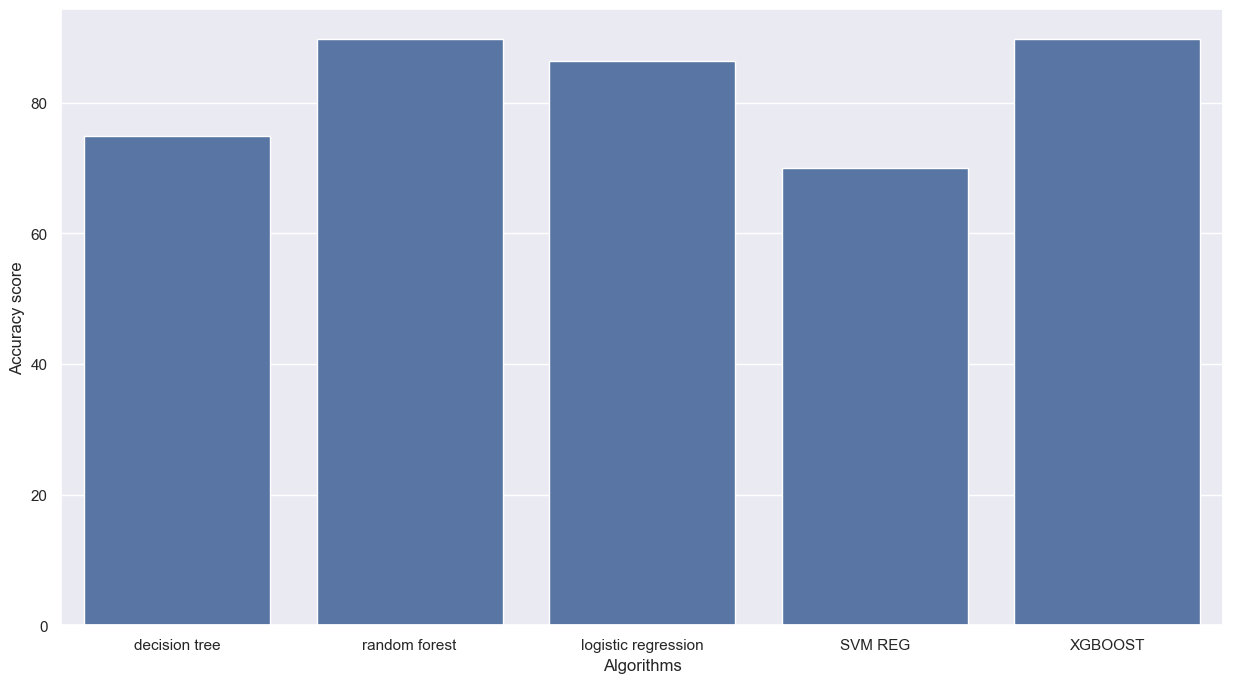

In [252]:
sns.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sns.barplot(x=algorithms,y=scores)

Support Vector Regressor - Mean Squared Error: 801.5232931668021
Support Vector Regressor - R2 Score: 0.6993514485368231
Random Forest Regressor - Mean Squared Error: 272.4147510622711
Random Forest Regressor - R2 Score: 0.8978181906847845
Gradient Boosting Regressor - Mean Squared Error: 271.650945476796
Gradient Boosting Regressor - R2 Score: 0.8981046914575385


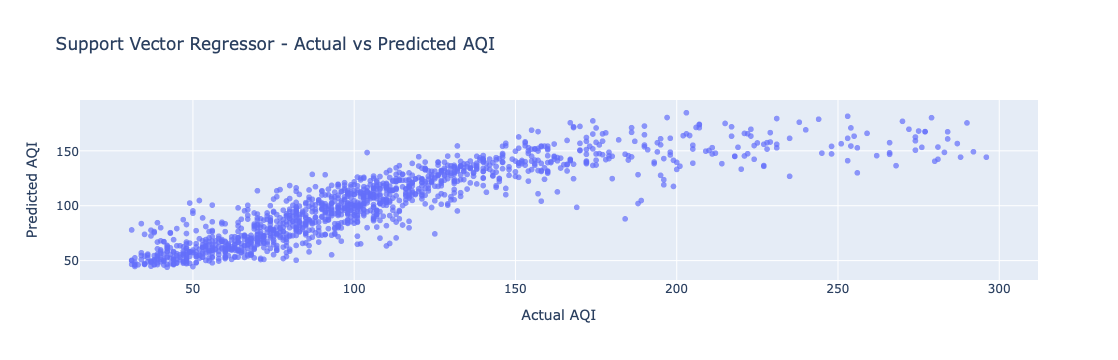

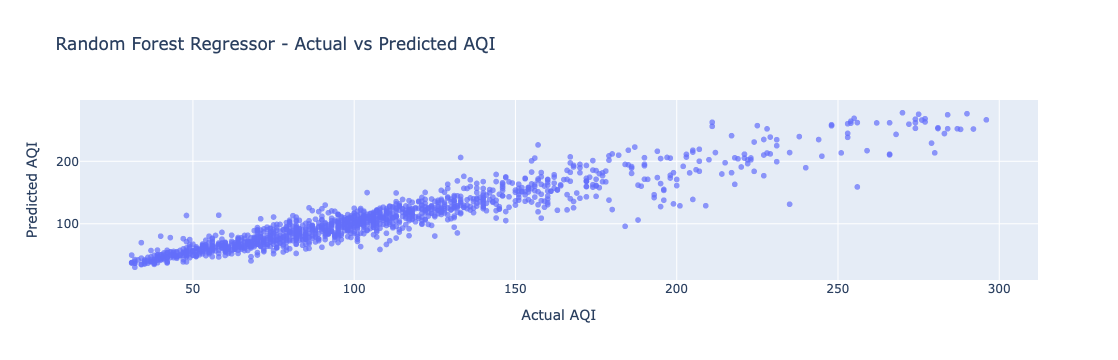

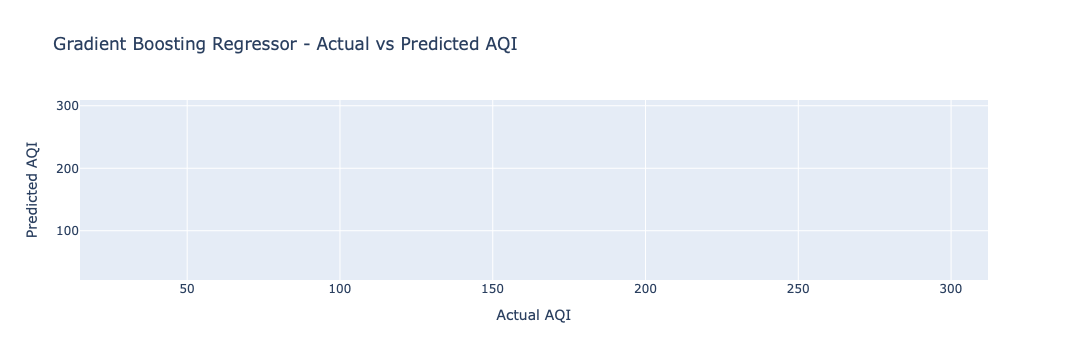

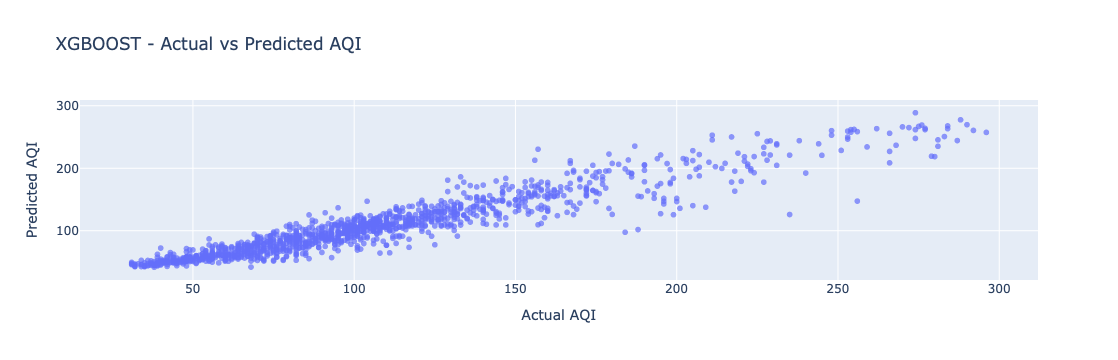

In [253]:
# Evaluation metrics
print('Support Vector Regressor - Mean Squared Error:', mean_squared_error(y_test, y_pred_svr))
print('Support Vector Regressor - R2 Score:', r2_score(y_test, y_pred_svr))

print('Random Forest Regressor - Mean Squared Error:', mean_squared_error(y_test, y_pred_rfr))
print('Random Forest Regressor - R2 Score:', r2_score(y_test, y_pred_rfr))

print('Gradient Boosting Regressor - Mean Squared Error:', mean_squared_error(y_test, y_pred_gbr))
print('Gradient Boosting Regressor - R2 Score:', r2_score(y_test, y_pred_gbr))


# Visualization
fig = px.scatter(x=y_test, y=y_pred_svr, opacity=0.7, labels={'x': 'Actual AQI', 'y': 'Predicted AQI'},
                 title='Support Vector Regressor - Actual vs Predicted AQI')
fig.show()

fig = px.scatter(x=y_test, y=y_pred_rfr, opacity=0.7, labels={'x': 'Actual AQI', 'y': 'Predicted AQI'},
                 title='Random Forest Regressor - Actual vs Predicted AQI')
fig.show()

fig = px.scatter(x=y_test, y=y_pred_gbr, opacity=0.7, labels={'x': 'Actual AQI', 'y': 'Predicted AQI'},
                 title='Gradient Boosting Regressor - Actual vs Predicted AQI')
fig.show()
fig = px.scatter(x=y_test, y=y_pred_gbr, opacity=0.7, labels={'x': 'Actual AQI', 'y': 'Predicted AQI'},
                 title='XGBOOST - Actual vs Predicted AQI')
fig.show()

In [254]:
out = gbr.predict([[.13,095.68,6.93,028.71,33.72,15.85,6.93,49.52,59.76,0.02,0.00,3.14]])

In [255]:
out

array([209.94636619])

In [256]:
if (out > 0 and out < 50):
    print('Good')
elif (out > 51 and out < 100):
    print('Satisfactory ')
elif (out > 101 and out < 200):
    print('Moderate')
elif (out > 201 and out < 300):
    print('Poor')
elif (out > 301 and out < 400):
    print('Very Poor')
elif (out > 401 and out < 500):
    print('Severe')

Poor


In [257]:

from tkinter import *
from tkinter import messagebox
from tkinter.filedialog import askopenfilename
from tkinter import ttk
import numpy as np
import pandas as pd
from PIL import ImageTk, Image
root = Tk()


root.title('air quality index')
root.geometry('850x650')
root.configure(background="purple2")

var = StringVar()
label = Label( root, textvariable = var,font=('arial',20,'bold'),bd=20,background="purple2")
var.set('air quality index')
label.grid(row=0,columnspan=6)

data = ""
data1 = ""

    
def predict():
    from tkinter import ttk
    from PIL import ImageTk, Image
    root10 = Tk()
    root10.title('Predict air quality index')
    root10.geometry('850x650')
    root10.configure(background="Purple3")
   
       
       
    label_1 = ttk.Label(root10, text ='city',font=("Helvetica", 16),background="purple3")
    label_1.grid(row=0,column=0)


    options_city = StringVar(root10)
    options_city.set("Select Option") 


    om1 = ttk.OptionMenu(root10, options_city,'Ahmedabad', 'Aizawl', 'Amarawati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam')
    om1.grid(row=0, column=1)
    
    label_2 = ttk.Label(root10, text = 'PM2.5(0.04 - 949)',font=("Helvetica", 16),background="Purple3")
    label_2.grid(row=1,column=0)
    
    Entry_2 = Entry(root10)
    Entry_2.grid(row=1,column=1)
    
    label_3 = ttk.Label(root10, text = 'PM10(0.01 -1000)',font=("Helvetica", 16,),background="Purple3")
    label_3.grid(row=2,column=0)
    
    Entry_3 = Entry(root10)
    Entry_3.grid(row=2,column=1)
    
    label_4 = ttk.Label(root10, text = 'NO(0.02-390)' ,font=("Helvetica", 16),background="Purple3")
    label_4.grid(row=3,column=0)
    
    Entry_4 = Entry(root10)
    Entry_4.grid(row=3,column=1)
    
    label_5 = ttk.Label(root10, text = 'NO2(0.01-362)',font=("Helvetica", 16),background="Purple3")
    label_5.grid(row=4,column=0)
    
    Entry_5 = Entry(root10)
    Entry_5.grid(row=4,column=1)
    
    label_6 = ttk.Label(root10, text = 'NOX(0-467)',font=("Helvetica", 16),background="Purple3")
    label_6.grid(row=5,column=0)
    
    Entry_6 = Entry(root10)
    Entry_6.grid(row=5,column=1)
    
    label_7 = ttk.Label(root10, text = 'NH3(0.01-352)',font=("Helvetica", 16),background="Purple3")
    label_7.grid(row=6,column=0)
    
    Entry_7 = Entry(root10)
    Entry_7.grid(row=6,column=1)
    
    label_8 = ttk.Label(root10, text = 'CO(0-175)',font=("Helvetica", 16),background="Purple3")
    label_8.grid(row=7,column=0)
    
    Entry_8 = Entry(root10)
    Entry_8.grid(row=7,column=1)
    
    label_9 = ttk.Label(root10, text = 'SO2(0.01-193)',font=("Helvetica", 16),background="Purple3")
    label_9.grid(row=8,column=0)
    
    Entry_9 = Entry(root10)
    Entry_9.grid(row=8,column=1)
    
    label_10 = ttk.Label(root10, text = 'O3(0.01-257)',font=("Helvetica", 16),background="Purple3")
    label_10.grid(row=9,column=0)
    
    Entry_10 = Entry(root10)
    Entry_10.grid(row=9,column=1)
    
    label_11 = ttk.Label(root10, text = 'Benzene(0-455)',font=("Helvetica", 16),background="Purple3")
    label_11.grid(row=10,column=0)
    
    Entry_11 = Entry(root10)
    Entry_11.grid(row=10,column=1)
    
    label_12 = ttk.Label(root10, text = 'Toluene(0-454)',font=("Helvetica", 16),background="Purple3")
    label_12.grid(row=11,column=0)
    
    Entry_12 = Entry(root10)
    Entry_12.grid(row=11,column=1)
    
    label_13 = ttk.Label(root10, text ='Xylene(0-170)',font=("Helvetica", 16),background="Purple3")
    label_13.grid(row=12,column=0)
    
    Entry_13 = Entry(root10)
    Entry_13.grid(row=12,column=1)

    
    global labelText,out

    def predout():
        state = options_city.get()
        if state == 'Ahmedabad':
            state = 0
        elif state == 'Aizawl':
            state = 1
        elif state == 'Amarawati':
            state = 2
        elif state == 'Bengaluru':
            state = 3
        elif state == 'Bhopal':
            state = 4
        elif state == 'Brajrajnagar':
            state = 5
        elif state == 'Chandigarh':
            state = 6
        elif state == 'chennai':
            state = 7
        elif state == 'Coimbatore':
            state = 8
        elif state == 'Delhi':
            state = 9
        elif state == 'Ernakulam':
            state = 10
        elif state == 'Gurugam':
            state = 11
        elif state == 'Guwahati':
            state = 12
        elif state == 'Hyderabad':
            state = 13    
        elif state == 'Jaipur':
            state = 14
        elif state == 'Jorapokhar':
            state = 15
        elif state == 'Koch':
            state = 16
        elif state == 'Kolkata':
            state = 17
        elif state == 'Lucknow':
            state = 18
        elif state == 'Mumbai':
            state = 19
        elif state == 'patna':
            state = 20 
        elif state == 'Shillong':
            state = 21
        elif state == 'Talcher':
            state = 22
        elif state == 'MIZORAM':
            state = 23
        elif state == 'Thiruvananthapuram':
            state = 24 
        elif state == 'Visakhapatnam':
            state = 25
        print(state)
        global labelText,logreg,le,X_test,out
        
        data = (float(Entry_2.get()),float(Entry_3.get()),
                float(Entry_4.get()),float(Entry_5.get()),float(Entry_6.get()),
                float(Entry_7.get()),float(Entry_8.get()),float(Entry_9.get()),
                float(Entry_10.get()),float(Entry_11.get()),float(Entry_12.get()),
                float(Entry_13.get()))
        list_1 =[data]
        out = regressor.predict(list_1)
        output.delete(0, END)
        output.insert(0,out[0])
        
        def predout_svc():
            print("hello")
            print(out)
            #global out
            
            from PIL import ImageTk,Image

            if (out >= 0 and out <= 50):
                print('Good')
                output1.delete(0, END)
                output1.insert(0,"Good")
            elif (out >= 51 and out <= 100):
                print('Satisfactory')
                output1.delete(0, END)
                output1.insert(0,"Satisfactory")
            elif (out >= 101 and out <= 200):
                print('Moderate')
                output1.delete(0, END)
                output1.insert(0,"Moderate")
            elif (out >= 201 and out <= 300):
                print('Poor')
                output1.delete(0, END)
                output1.insert(0,"Poor")
            elif (out >= 301 and out <= 400):
                print('Very Poor')
                output1.delete(0, END)
                output1.insert(0,"Very Poor")
            elif (out > 401 ):
                print('Severe')
                output1.delete(0, END)
                output1.insert(0,"Severe")
            
            image = Image.open("result.png")
            image = image.resize((250, 250), Image.ANTIALIAS)
            img = ImageTk.PhotoImage(image)  
            panel1 = Label(root, image=img)
            panel1.image = img
            panel1.grid(row=8,column=3)    
                
                
        label_27 =Button (root10, text = 'predict',font=("Helvetica", 16),background="Purple3",command = predout_svc)
        label_27.grid(row=14,column=0)


        output1 = Entry(root10)
        output1.grid(row=14,column=1)
            
       
        
        labelText.set(data)
    
    label_26 = Button(root10, text = 'AQI',font=("Helvetica", 16),background="Purple3",command = predout)
    label_26.grid(row=13,column=0)  

    output = Entry(root10)
    output.grid(row=13,column=1)
        
        
   
    
   


labelText = StringVar()
labelText.set("")
output = Label(root, textvariable=labelText,width=45, height=6,bg="purple2")
output.grid(row=3,column=4)

B1 = Button(root, text = "Predict",height=1,padx=16,pady=16,bd=8,font=('arial',16,'bold'),width=10,bg="purple2",command = predict)
B1.grid(row=1,column=5)

root.mainloop()

0
hello
[234.73]
Poor


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/advith/anaconda3/envs/project/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/lq/r93z3pl57vbfffj0x5mpl5jh0000gn/T/ipykernel_1769/3857474346.py", line 225, in predout_svc
    image = image.resize((250, 250), Image.ANTIALIAS)
AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'


0
0
0
hello
[234.73]
Poor


Exception in Tkinter callback
Traceback (most recent call last):
  File "/Users/advith/anaconda3/envs/project/lib/python3.8/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/lq/r93z3pl57vbfffj0x5mpl5jh0000gn/T/ipykernel_1769/3857474346.py", line 225, in predout_svc
    image = image.resize((250, 250), Image.ANTIALIAS)
AttributeError: module 'PIL.Image' has no attribute 'ANTIALIAS'
